In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
B1_IO = pd.read_csv('Data/Batch_1/Interval_order.csv')
B1_Depth = pd.read_csv('Data/Batch_1/Depth.csv')

B2_IO = pd.read_csv('Data/Batch_2/Interval_order.csv')
B2_Depth = pd.read_csv('Data/Batch_2/Depth.csv')

((79451, 3), (79451, 24))


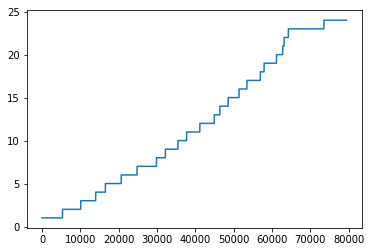

In [3]:
plt.plot(B1_IO['Chrom'])
print(B1_IO.shape, B1_Depth.shape)


((79451, 3), (79451, 24))


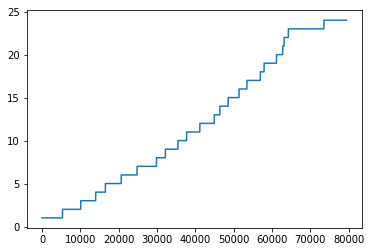

In [4]:
plt.plot(B2_IO['Chrom'])
print(B2_IO.shape, B2_Depth.shape)

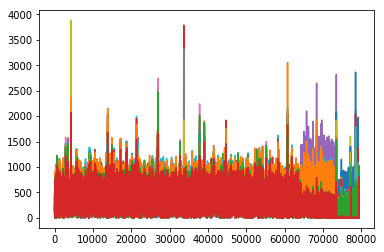

In [5]:
plt.plot(B2_Depth)

In [6]:
B1_IO.head() 

,Chrom,Start,End
0,1,948903,949006
1,1,949313,949413
2,1,949414,949513
3,1,949514,949613
4,1,949614,949713


In [7]:
B1_IO.loc[B1_IO['Chrom'] == 24].head() 

,Chrom,Start,End
73537,24,2649475,2649574
73538,24,2649575,2649674
73539,24,2654743,2654843
73540,24,2654844,2654943
73541,24,2654944,2655043


In [8]:
bounds=[] 
for i in range(1,25): 
    bounds.append((B1_IO.loc[B1_IO['Chrom'] == i].iloc[0].name,B1_IO.loc[B1_IO['Chrom'] == i].iloc[-1].name)) 

In [9]:
bounds[0]

(0, 5292)

In [10]:
counts = np.zeros((24,24)) # Chromosome number (1-23) (on the rows) x sample number (1-24) (on the columns)
for i in range(24):
    counts[i,:] = np.sum(B1_Depth[bounds[i][0]:bounds[i][1]+1]) #watch the notation here bc I think calls one too short for DataFrames 
#B1_Depth.iloc[bounds[0][0]]

In [38]:
#For weighted counts instead, to not bias for larger reads 
wtcounts=np.zeros((24,24))
for i in range(24):
    wtcounts[i,:] = np.sum(B1_Depth[bounds[i][0]:bounds[i][1]+1])/np.sum(B1_IO[bounds[i][0]:bounds[i][1]+1]['End']-B1_IO[bounds[i][0]:bounds[i][1]+1]['Start'])
    # Check this but the second part should be normalization over size of read 

In [39]:
B1_IO[bounds[i][0]:bounds[i][1]+1]['End']-B1_IO[bounds[i][0]:bounds[i][1]+1]['Start']

73537     99
73538     99
73539    100
73540     99
73541     99
73542     99
73543     99
73544     99
73545     99
73546     99
73547     99
73548     99
73549     99
73550     99
73551     99
73552     99
73553     99
73554     99
73555     99
73556     99
73557     99
73558     99
73559     99
73560     99
73561     99
73562     99
73563     99
73564     99
73565     99
73566     99
        ... 
79421     84
79422    100
79423     99
79424     99
79425     99
79426     99
79427    159
79428    100
79429     99
79430     99
79431     99
79432     99
79433    119
79434    100
79435    149
79436    100
79437    125
79438    139
79439    100
79440     99
79441     99
79442     99
79443     83
79444    100
79445    138
79446    100
79447     99
79448     99
79449     99
79450     99
Length: 5914, dtype: int64

In [40]:
wtcounts[:,0]

array([3.72035549, 3.70916502, 3.6777645 , 3.84635752, 3.76221691,
       3.90850925, 3.73357902, 3.45395795, 3.69985543, 3.75705845,
       3.71740379, 3.70709961, 3.66995237, 3.94600009, 3.72756514,
       3.39316535, 3.77079062, 3.75993786, 3.09182697, 3.41843269,
       3.56924357, 3.26818282, 1.82214917, 1.48448123])

In [41]:
counts[:,0]

array([1998723.7814    , 1793318.2324    , 1464504.2118    ,
        995364.2441    , 1573355.3504    , 1635308.545     ,
       1901713.41010001,  814208.4152    , 1229598.8546    ,
        863341.9744    , 1296392.5281    , 1420397.4586    ,
        548166.1053    ,  877353.661     , 1066817.9616    ,
        711136.2002    , 1345010.8483    ,  376478.8181    ,
       1010328.6676    ,  569938.1903    ,  132479.6137    ,
        368046.4084    , 1690648.31290004,  892136.10469999])

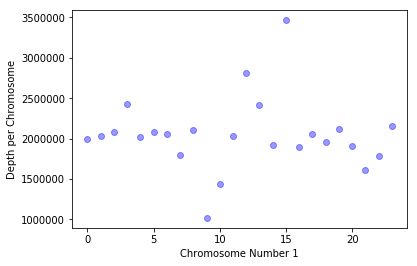

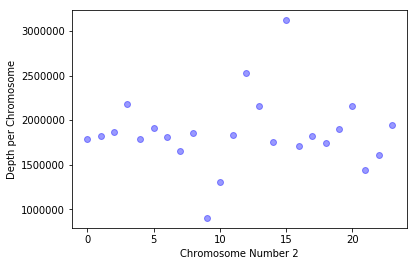

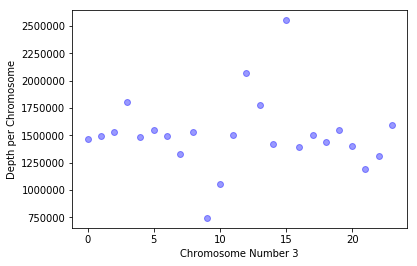

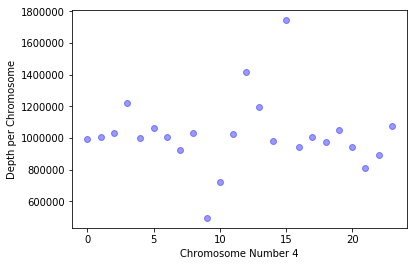

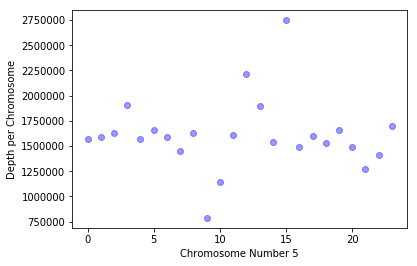

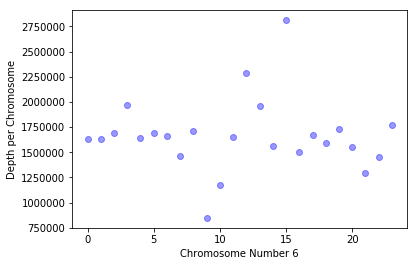

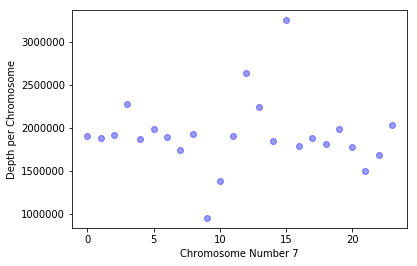

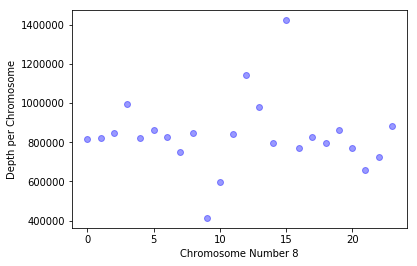

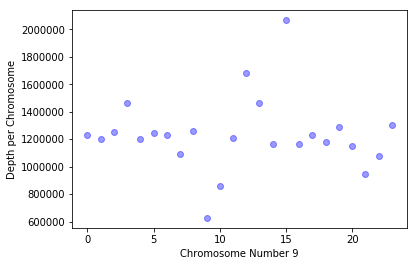

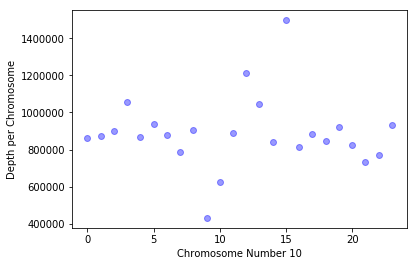

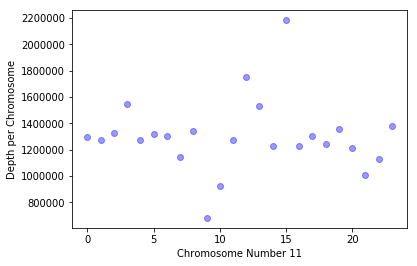

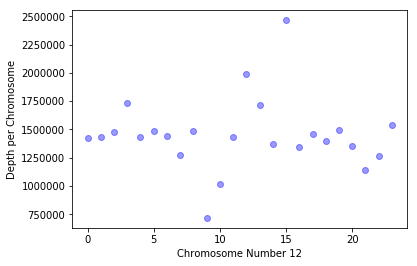

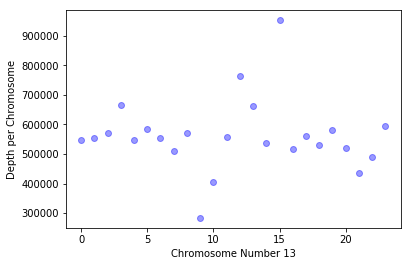

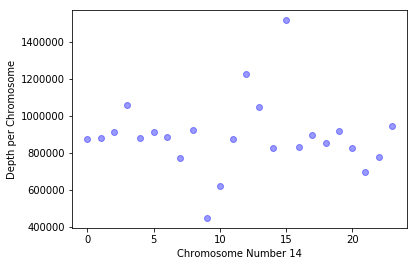

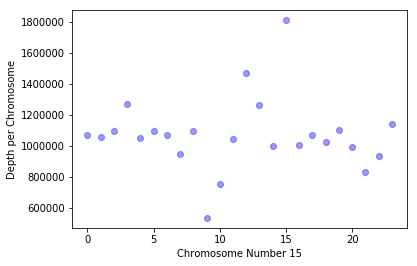

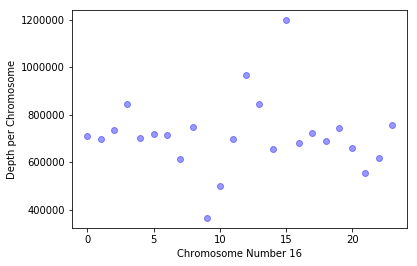

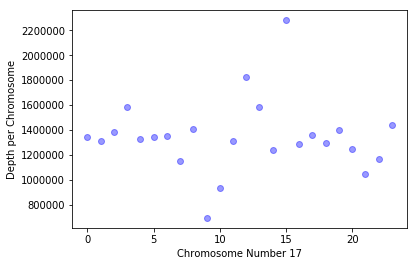

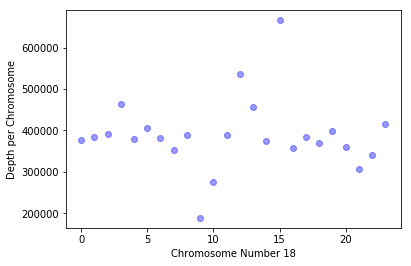

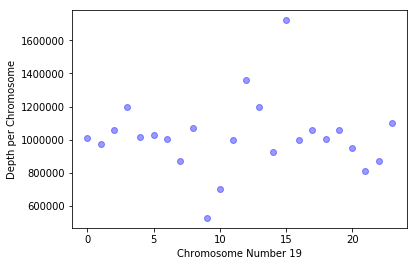

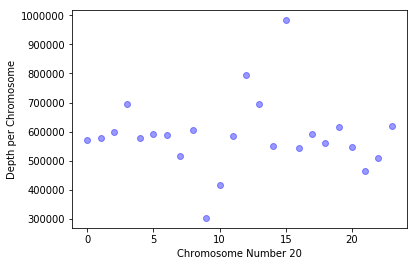

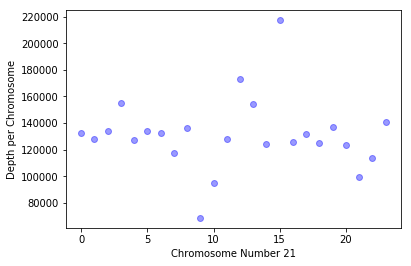

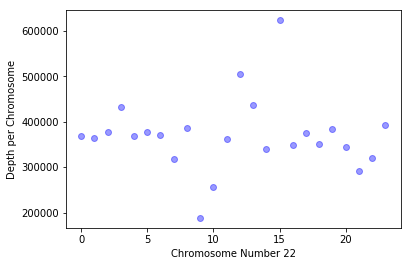

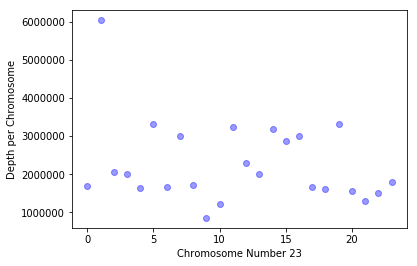

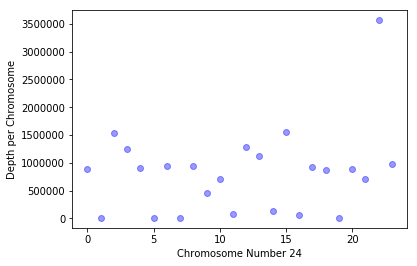

In [42]:
# Let's make a plot of the counts for each chromosome for each sample 
for i in range(24): 
    plt.figure() 
    plt.plot(counts[i,:], 'bo', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosome Number ' + str(i+1))

In [43]:
np.argmax(counts[0,:])

15

In [44]:
counts[0,:][15]

3465935.246699991

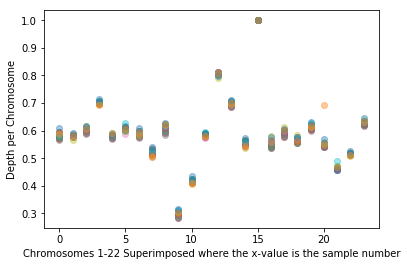

In [45]:
# Normalized signature plot?  
for i in range(22):  
    plt.plot(counts[i,:]/counts[i,:][np.argmax(counts[i,:])], 'o', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosomes 1-22 Superimposed where the x-value is the sample number')

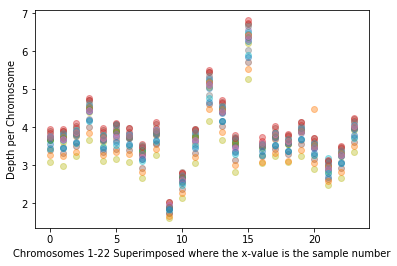

In [46]:
# Normalized signature plot?  
for i in range(22):  
    plt.plot(wtcounts[i,:], 'o', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosomes 1-22 Superimposed where the x-value is the sample number')

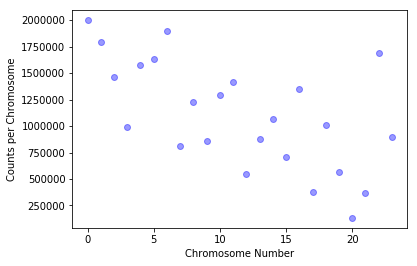

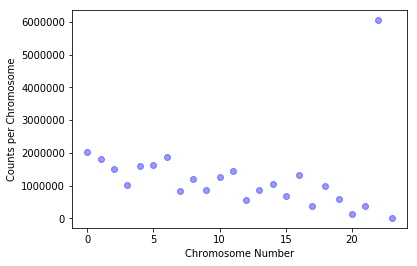

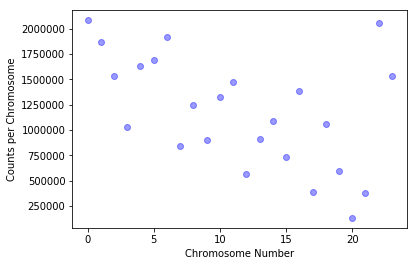

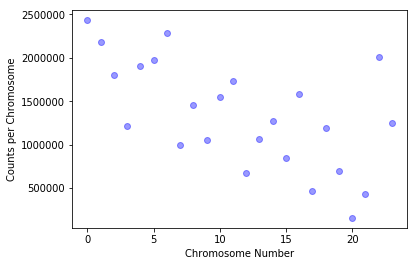

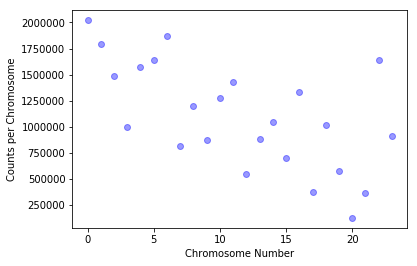

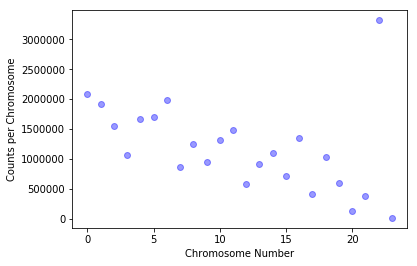

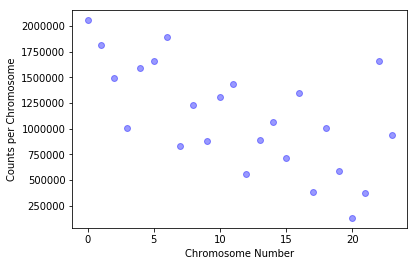

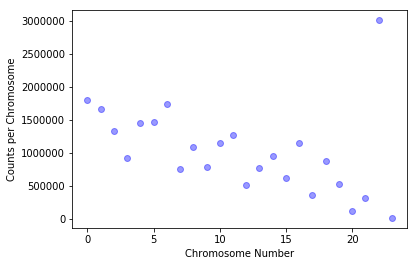

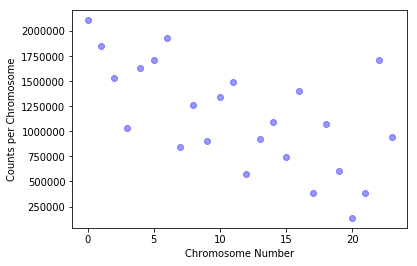

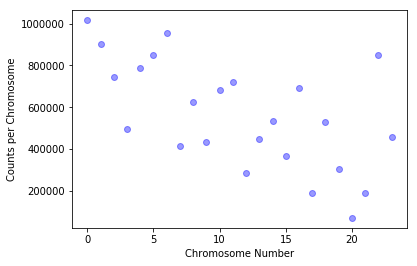

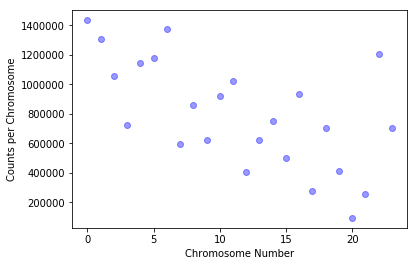

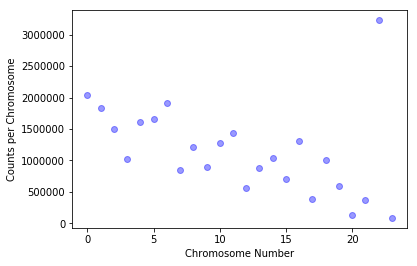

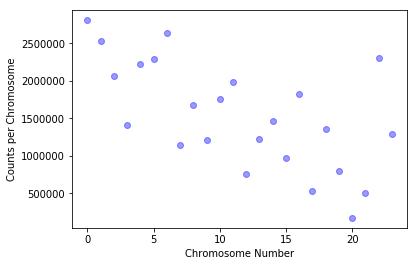

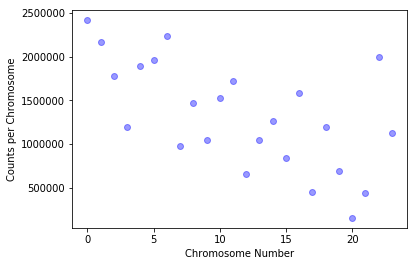

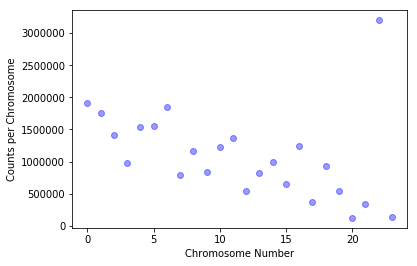

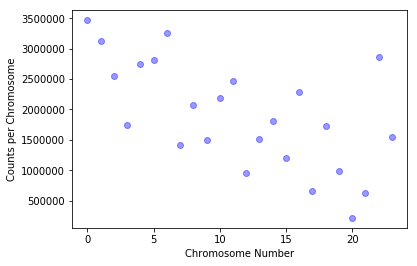

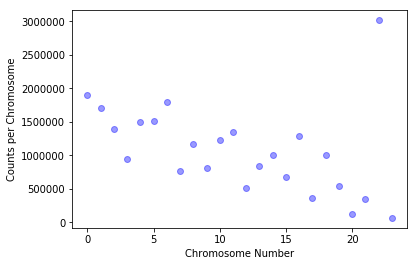

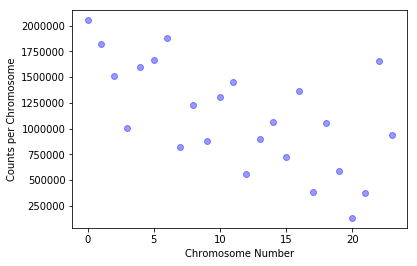

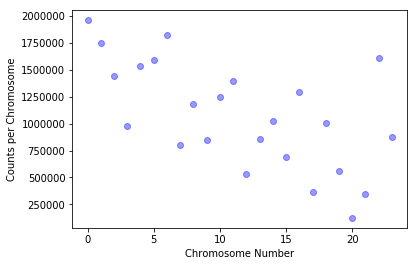

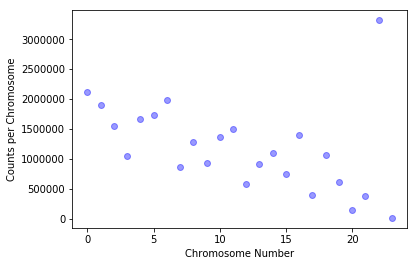

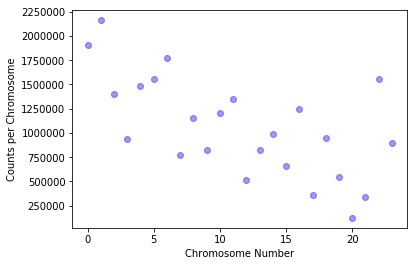

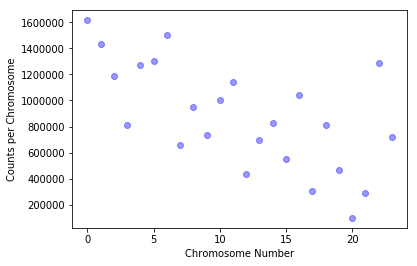

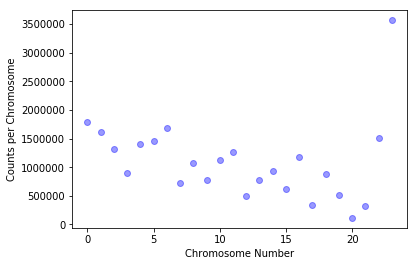

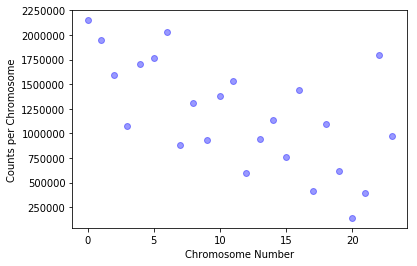

In [66]:
# And now let's see the counts for each chromosome per sample 
for i in range(24): 
    plt.figure() 
    plt.plot(counts[:,i], 'bo', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosome Number') 

In [8]:
print(B1_IO.shape, B1_Depth.shape)

((79451, 3), (79451, 24))
